<a href="https://colab.research.google.com/github/Patelrishabh99/cognorise/blob/main/DIGIT_RECOGNIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGIT RECOGNIZER using ann

**loading** **the** **library**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**loading** **the** **mnist** **data**

In [48]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [49]:
print(type(X_train),type(Y_train),type(X_test),type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [50]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We have

60000 --> train data

10000 --> test data




In [51]:
print(X_train[1000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

In [52]:
print(X_train[1000].shape)

(28, 28)


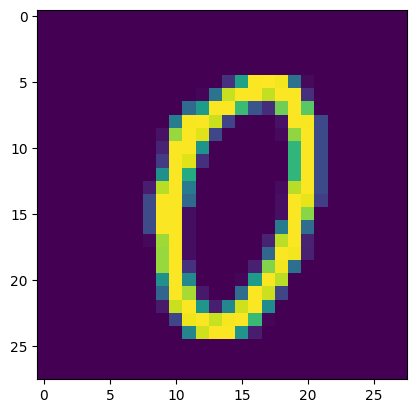

0


In [53]:
plt.imshow(X_train[1000])
plt.show()
print(Y_train[1000])

In [54]:
print(np.unique(Y_train))
#for the unique values in train label

print(np.unique(Y_test))
#for the unique values in test label

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [55]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [56]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [57]:
print(X_train[1000])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [58]:
#layers in ann
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2926 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1413 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

THE ACCURACY FOR TRAINING DATA IS 97%

**TEST ACCURACY** ----->

In [61]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9766
0.9765999913215637


Test data accuracy is 95.2%

In [62]:
print(X_test.shape)

(10000, 28, 28)


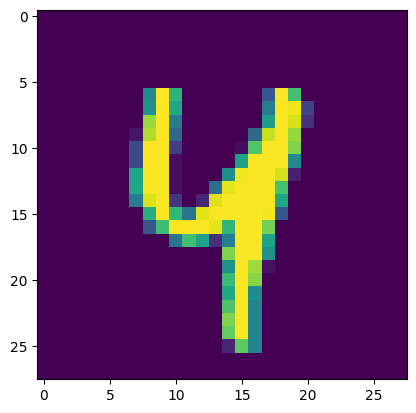

In [63]:
#testing on test data
plt.imshow(X_test[42])
plt.show()


In [64]:
print(Y_test[42])

4


In [65]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [66]:
print(y_pred.shape)

(10000, 10)


In [67]:
print(y_pred[42])

[2.1557712e-11 2.2935444e-02 3.5829553e-06 9.0506487e-03 1.0000000e+00
 2.5152929e-06 3.1764502e-10 4.1984713e-01 5.9291804e-03 9.9147475e-01]


In [68]:
first_test_label=np.argmax(y_pred[42])
print(first_test_label)

4


In [69]:
print(y_pred)

[[2.9894249e-03 1.5104192e-01 1.2995955e-01 ... 9.9998999e-01
  1.0807274e-02 6.8248045e-01]
 [2.4715532e-04 9.9937797e-01 1.0000000e+00 ... 1.1831018e-09
  1.1156466e-01 3.3255103e-09]
 [3.8857611e-03 9.9958873e-01 1.4604961e-02 ... 3.4006786e-01
  5.3599954e-01 8.1548784e-03]
 ...
 [3.7982847e-10 1.5112463e-05 1.5124571e-07 ... 3.9471552e-01
  6.6774088e-01 9.9986988e-01]
 [2.1795383e-04 1.4722570e-04 1.9278248e-09 ... 2.5028396e-02
  9.9032253e-01 4.8897072e-04]
 [6.6068745e-01 5.0316598e-02 1.2964699e-01 ... 3.2040957e-09
  5.0165165e-02 1.7594233e-05]]


In [72]:
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [73]:
print(y_pred_label[42])

4


In [74]:
 con_matrix=confusion_matrix(Y_test,y_pred_label)

In [75]:
print(con_matrix)

tf.Tensor(
[[ 964    1    1    1    2    4    3    1    3    0]
 [   0 1126    0    0    0    2    2    0    5    0]
 [   2    3  999    6    5    1    2    1   13    0]
 [   0    0    5  981    1    7    1    3    9    3]
 [   0    0    2    1  968    0    3    3    1    4]
 [   2    0    0    9    1  866    2    1    8    3]
 [   2    1    1    1    7    7  934    0    5    0]
 [   2    5    6    0    1    0    0 1004    5    5]
 [   0    0    2    5    3    6    1    2  950    5]
 [   1    2    1    4   13    3    0    6    6  973]], shape=(10, 10), dtype=int32)


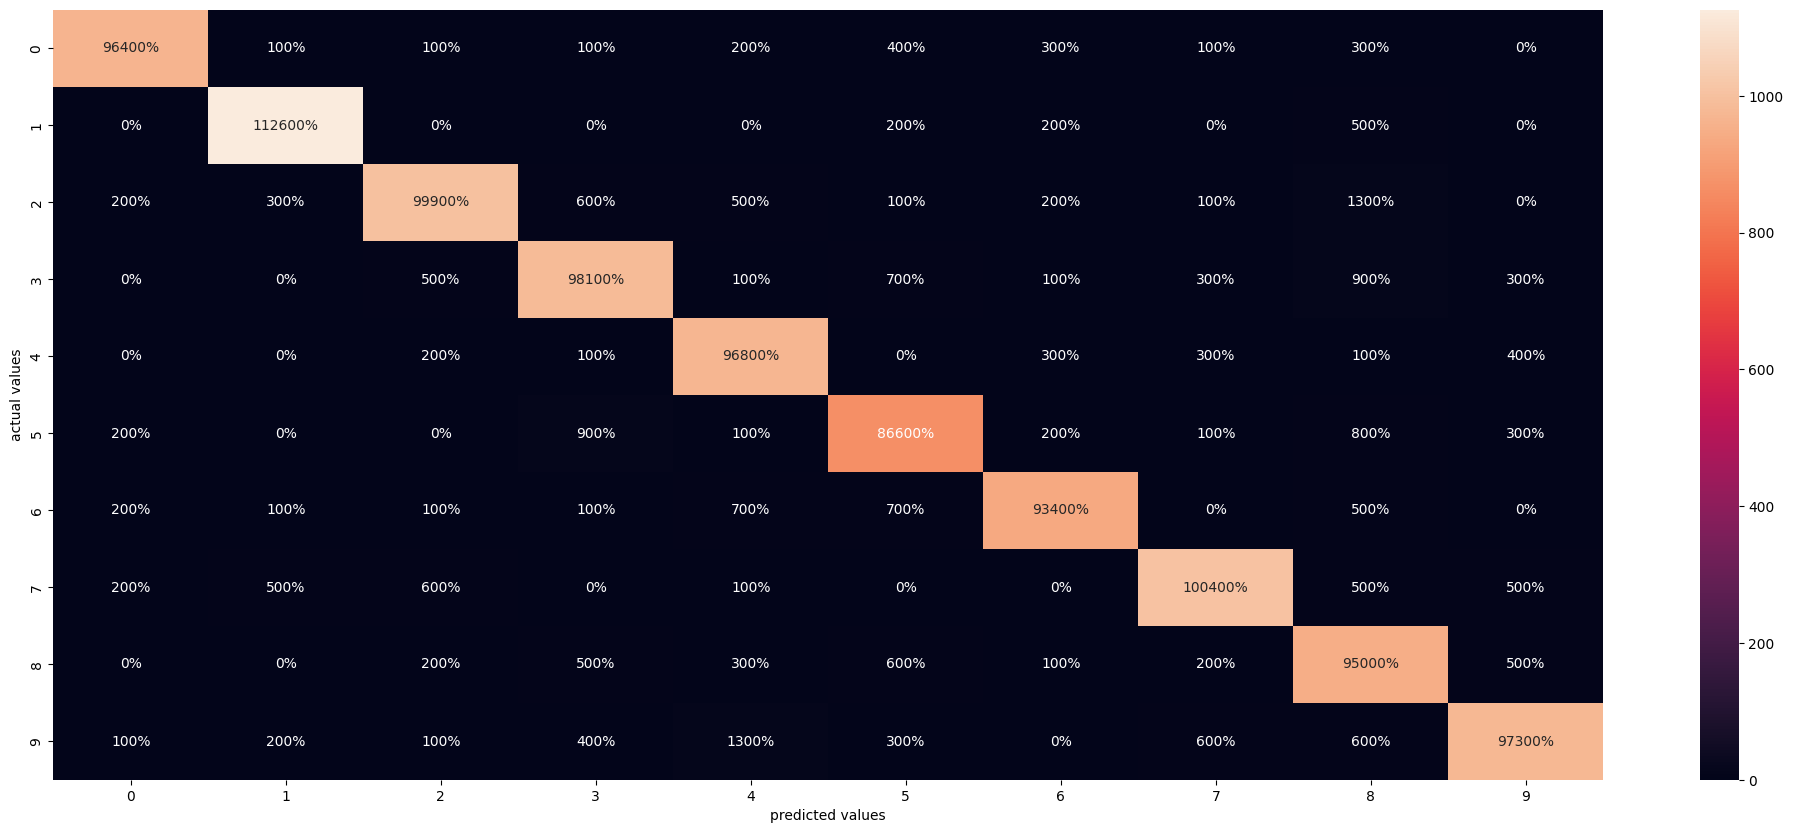

In [76]:
plt.figure(figsize=(25,10))
sns.heatmap(con_matrix,annot=True,fmt='.0%')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

**Prediction** **system**

In [77]:
input_image=cv2.imread(input("enter the image path "))

enter the image path/content/sample_image.png


In [78]:
print(input_image)


[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


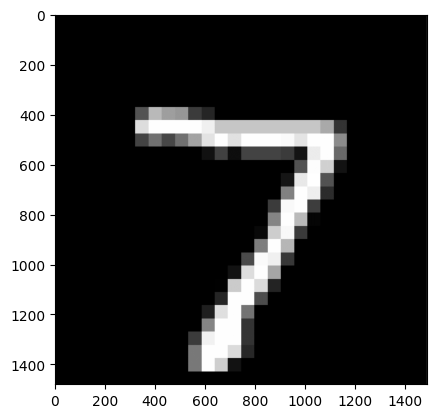

In [79]:
plt.imshow(input_image)
plt.show()

In [80]:
print(input_image.shape)

(1480, 1490, 3)


In [81]:
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [83]:
print(greyscale.shape)

(1480, 1490)


In [84]:
image_resize=cv2.resize(greyscale,(28,28))

In [85]:
cv2_imshow(image_resize)

In [86]:
image_resize=image_resize/255

In [87]:
image_reshape=np.reshape(image_resize,[1,28,28])

In [88]:
prediction=model.predict(image_reshape)

1/1 [==============================] - 0s 54ms/step


In [89]:
print(prediction)

[[2.9525231e-03 1.5028016e-01 1.3050017e-01 8.8289154e-01 1.5402396e-08
  6.6587523e-02 3.6004920e-08 9.9998993e-01 1.0767224e-02 6.8033719e-01]]


In [90]:
pred_label=np.argmax(prediction)

In [91]:
print(pred_label)

7


**building** **a** ***predictive*** **system**

enter the image path /content/sample_image.png
1/1 [==============================] - 0s 28ms/step
the hand written digit is : 7


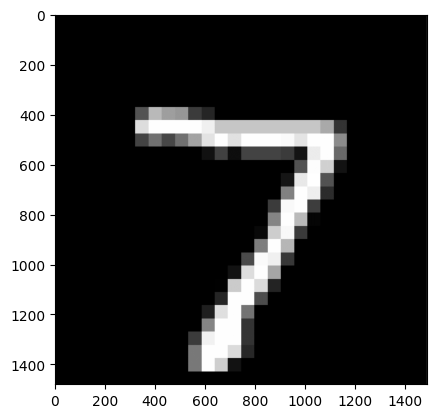

In [97]:
input_image=cv2.imread(input("enter the image path "))
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
image_resize=cv2.resize(greyscale,(28,28))
image_resize=image_resize/255
image_reshape=np.reshape(image_resize,[1,28,28])
prediction=model.predict(image_reshape)
pred_label=np.argmax(prediction)
print("the hand written digit is :",pred_label)
plt.imshow(input_image)
plt.show()

hence we have build the ann system and now

the prediction value is 7

**THANK** **YOU**